In [227]:
!pip install -U pandas-profiling

# Importing libreries:

In [553]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sqlalchemy import create_engine
import seaborn as sns
import sklearn.metrics as metrics
import pandas_profiling as pp
import pickle
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from matplotlib import rcParams

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score, f1_score ,f1_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

# Data Exploration and Assessing

In [554]:
DFcardio = pd.read_csv('/Users/shahadfahad/Desktop/Classification/cardio_train.csv',sep=';')
DFcardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [415]:
print(f"- The dataset containes {DFcardio.shape[0]} employees records with {DFcardio.shape[1]} columns.")
print('\n----------------------------------------------------\n')

print(f"\n-The columns data type:\n{DFcardio.dtypes}") 
print('\n----------------------------------------------------\n')


print(f"\n-Number of null values:\n{DFcardio.isnull().sum()}")
print('\n----------------------------------------------------\n')

print("\n- The dataset inforomation:\n")
DFcardio.info()

- The dataset containes 70000 employees records with 13 columns.

----------------------------------------------------


-The columns data type:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

----------------------------------------------------


-Number of null values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

----------------------------------------------------


- The dataset inforomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  

## Data Cleaning

In [556]:
DFcardio.drop(columns=['id'],inplace=True)
DFcardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [557]:
DFcardio['age'] = (DFcardio['age'] / 365).round().astype('int')

In [418]:
DFcardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [558]:
DFcardio.drop_duplicates(inplace=True)
DFcardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [420]:
DFcardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,1.357231,164.345114,74.579057,129.304938,97.607186,1.385985,1.238169,0.092772,0.056751,0.797625,0.513614
std,6.807710,0.479187,8.353877,14.613279,158.368179,193.782532,0.692229,0.584137,0.290114,0.231368,0.401773,0.499818
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [421]:
DFcardio.isna().any()


age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

## EDA and Visulizations

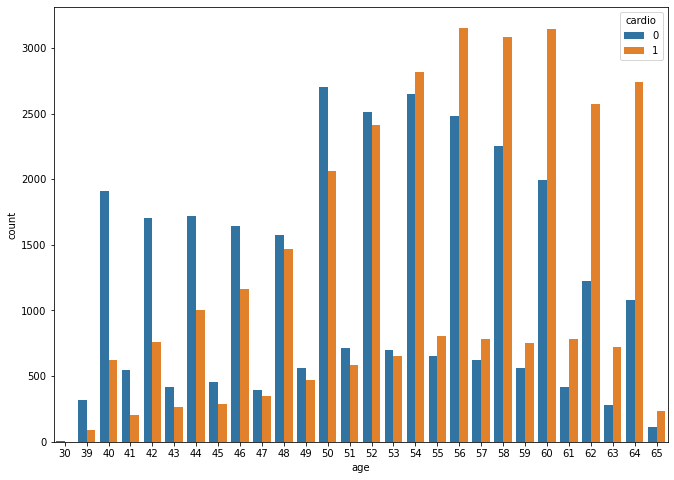

In [422]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = DFcardio);

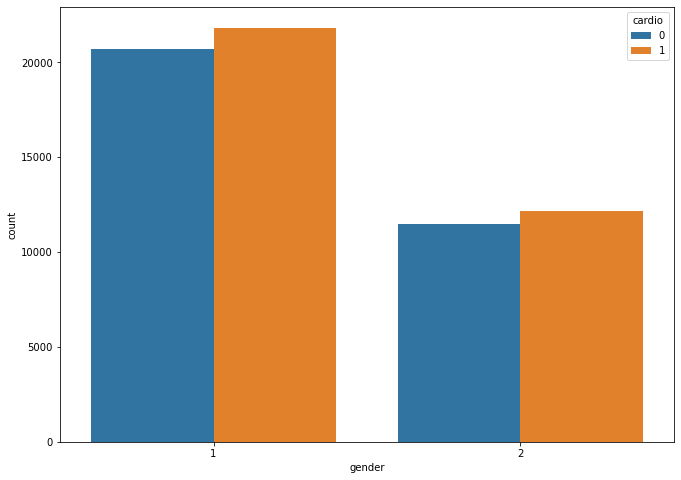

In [423]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = DFcardio);


In [424]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3,subplot_titles=("Alchoal Distribution", "Gender Distribution", "Choslesterol Distribution", "Glucose Distribution", "Smoking Distribution", " Active Distribution"),
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Non Alchoalic', 'Alchoalic'],values= DFcardio['alco'].value_counts().values, name = 'Alchoal Status'), 1, 1)
fig.add_trace(go.Pie(labels=['Female', 'Male'],values= DFcardio['gender'].value_counts().values, name = 'Gender Status'), 1, 2)

fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values= DFcardio['cholesterol'].value_counts().values, name = 'Cholesterol Level Status'), 1, 3)
fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values= DFcardio['gluc'].value_counts().values, name = 'Glucose Level Status'), 2, 1)

fig.add_trace(go.Pie(labels=['Non Smoker', 'Smoker'],values= DFcardio['smoke'].value_counts().values, name = 'Smoking Status'), 2, 2)
fig.add_trace(go.Pie(labels=['Not Involved in Physical Activites', 'Involved in Physical Activites'],values= DFcardio['active'].value_counts().values, name = 'Fitness Status'), 2, 3)

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribution of Various Categorial Values")

fig.show()

In [425]:
DFcardio.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023792,-0.083605,0.051836,0.020675,0.017589,0.156019,0.098916,-0.050144,-0.031596,-0.009399,0.234270
gender,-0.023792,1.000000,0.504363,0.149134,0.005159,0.014065,-0.044587,-0.026668,0.340583,0.170933,0.009320,0.001365
height,-0.083605,0.504363,1.000000,0.291809,0.005646,0.006337,-0.049736,-0.018080,0.190518,0.095972,-0.006445,-0.009298
weight,0.051836,0.149134,0.291809,1.000000,0.029490,0.041835,0.132124,0.099856,0.061179,0.062168,-0.010875,0.174474
ap_hi,0.020675,0.005159,0.005646,0.029490,1.000000,0.015771,0.022368,0.010762,-0.001831,0.000674,0.000835,0.053770
ap_lo,0.017589,0.014065,0.006337,0.041835,0.015771,1.000000,0.021686,0.009023,0.003731,0.009437,0.006278,0.064759
cholesterol,0.156019,-0.044587,-0.049736,0.132124,0.022368,0.021686,1.000000,0.443462,0.002487,0.029740,0.019443,0.213036
gluc,0.098916,-0.026668,-0.018080,0.099856,0.010762,0.009023,0.443462,1.000000,-0.010642,0.006645,0.000582,0.080470
smoke,-0.050144,0.340583,0.190518,0.061179,-0.001831,0.003731,0.002487,-0.010642,1.000000,0.337553,0.030539,-0.023715
alco,-0.031596,0.170933,0.095972,0.062168,0.000674,0.009437,0.029740,0.006645,0.337553,1.000000,0.029440,-0.014259


The Heatmap correlation between all the features (Heatmap)

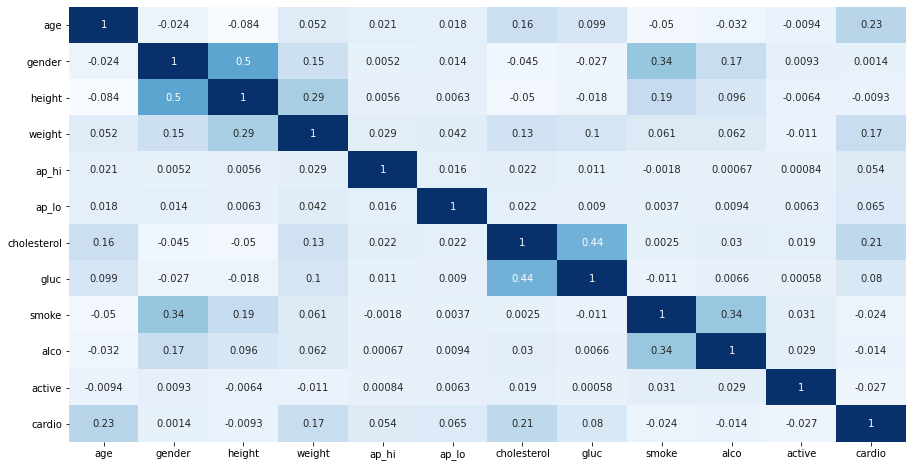

In [559]:
plt.subplots(figsize=(15,8))
dataplot = sns.heatmap(DFcardio.corr(), cbar=False, annot=True, cmap="Blues")

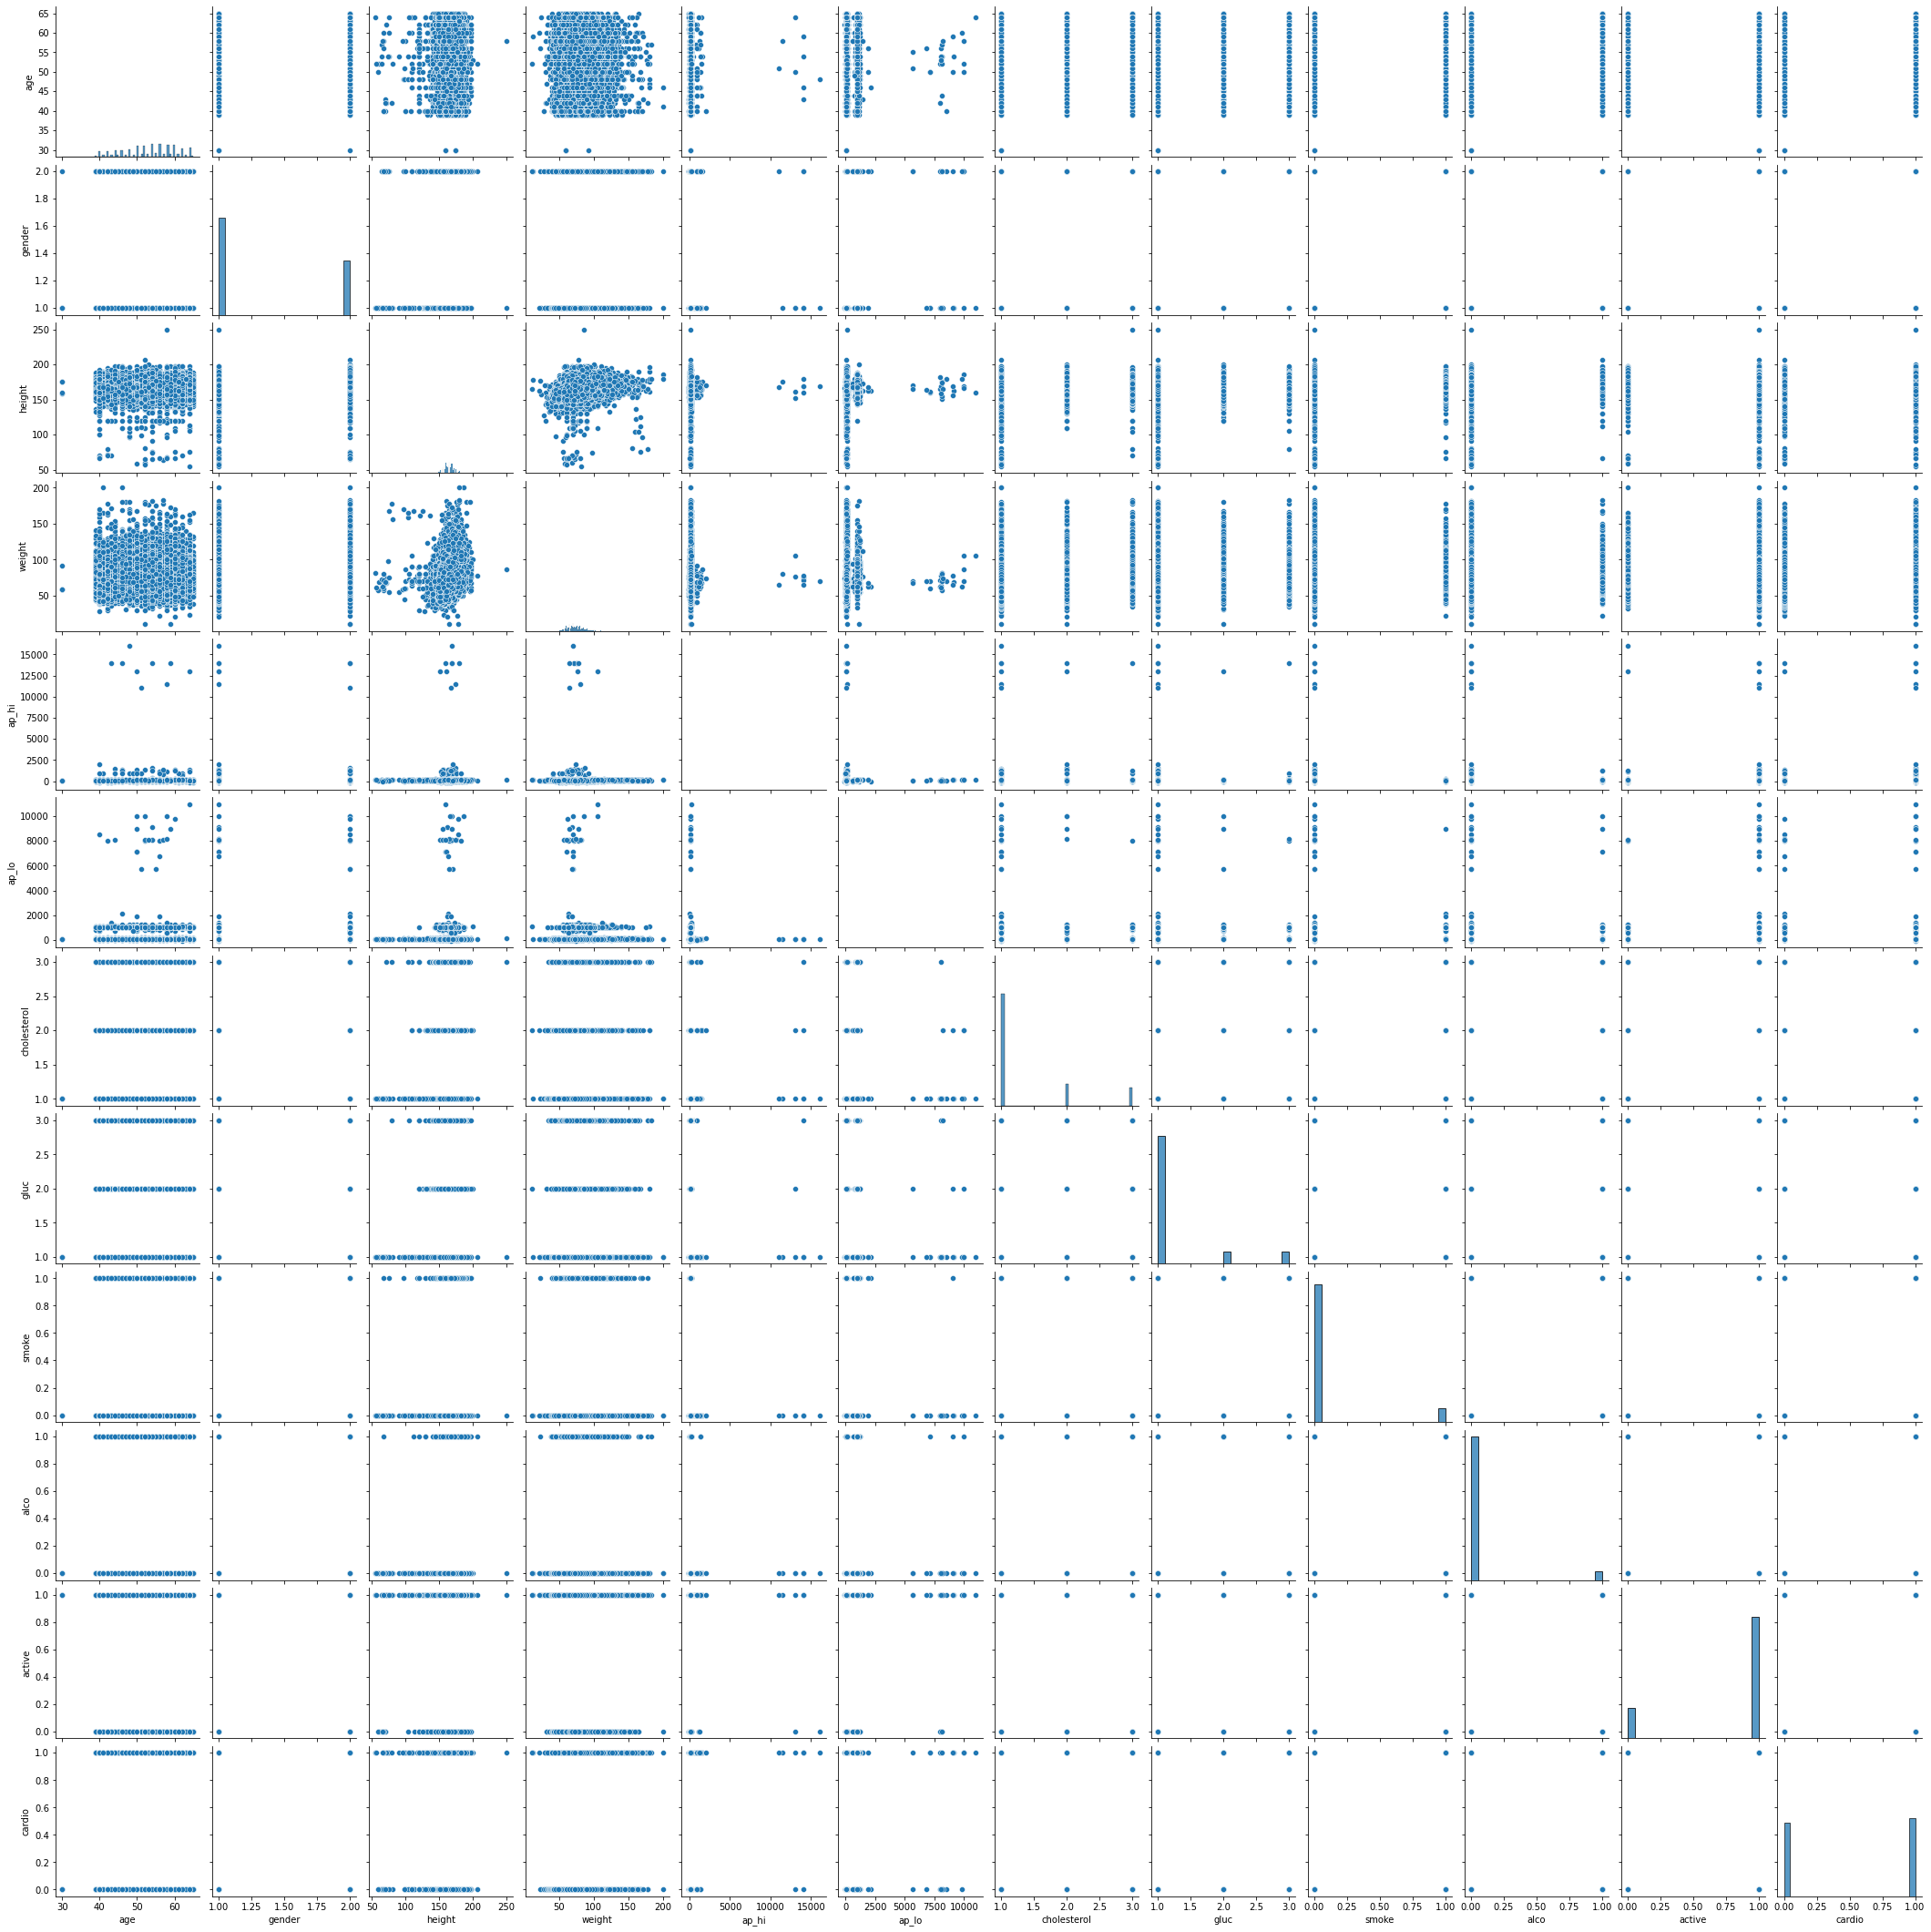

In [560]:
sns.pairplot(DFcardio)

# Data balanced and  Splitting the data

1    0.513614
0    0.486386
Name: cardio, dtype: float64


<AxesSubplot:title={'center':'Distribution of cardio'}>

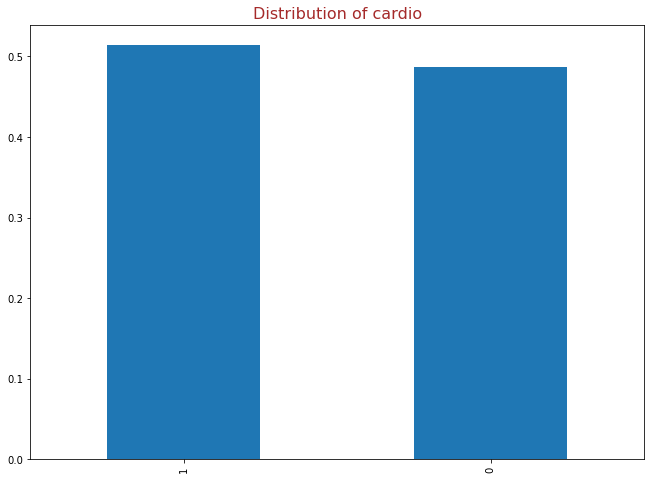

In [428]:
#visualize the imbalance with a bar chart
target_pcts = DFcardio.cardio.value_counts(normalize=True) 
labels = ['Not cardio', 'cardio']
plt.title('Distribution of cardio', fontdict={'size' : 16, 'color':'brown'})

print(target_pcts)
target_pcts.plot(kind='bar')



In [483]:
X = DFcardio.drop(['cardio'], axis = 1)
y = DFcardio['cardio']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Baseline
 

In [484]:
b = LogisticRegression()
b.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [485]:

b.score(X_train ,y_train)

0.7164487979857207

In [486]:
b.score(X_test, y_test)

0.7199031040504761

In [487]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LogisticRegression()
Plr.fit(X_train_poly, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [488]:
print(Plr.score(X_train_poly, y_train))

0.7081019556444659


In [489]:
print(Plr.score(X_test_poly, y_test))


0.7107205227874486


In [490]:
print(Plr.score(X_val_poly, y_val))

0.7075486882343474


# Remove outliers

<AxesSubplot:>

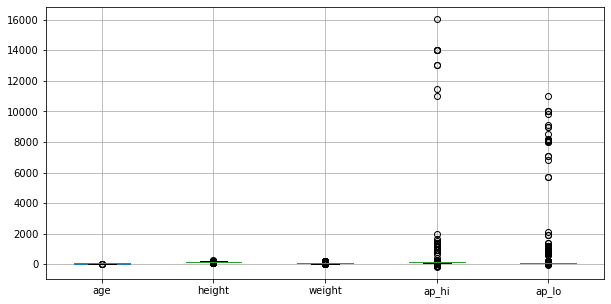

In [438]:
outlier =['age', 'height', 'weight', 'ap_hi','ap_lo']
plt.figure(figsize = (10,5))
DFcardio.boxplot(outlier)


In [439]:

def is_outlier_IQR(DFcardio, x):
    Q1 = DFcardio[x].quantile(0.25)
    Q3 = DFcardio[x].quantile(0.75)
    IQR = Q3 - Q1
    high = Q3 + 1.5 * IQR
    low = Q1 - 1.5 * IQR
    return DFcardio[~((DFcardio[x] < low) |(DFcardio[x] > high))]

for x in outlier:
    DFcardio = is_outlier_IQR(DFcardio, x)

In [442]:
DFcardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,60,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1
69994,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


##  Feature Engineering

 BMI =(Weight IN KG / (Height IN M )^2)

In [443]:
DFcardio['bmi'] = DFcardio['weight']/((DFcardio['height']/100)**2)


In [444]:
DFcardio = DFcardio.drop(['height','weight'],axis=1)

In [395]:
DFcardio

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,52,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,130,90,1,1,0,0,1,1,23.661439
69994,58,1,150,80,1,1,0,0,1,1,29.384757
69995,53,2,120,80,1,1,1,0,1,0,26.927438
69998,61,1,135,80,1,2,0,0,0,1,27.099251


# Polynomial

In [493]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LogisticRegression()
Plr.fit(X_train_poly, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [494]:
print(Plr.score(X_train_poly, y_train))

0.7081019556444659


In [495]:
print(Plr.score(X_test_poly, y_test))

0.7107205227874486


In [496]:
print(Plr.score(X_val_poly, y_val))

0.7075486882343474


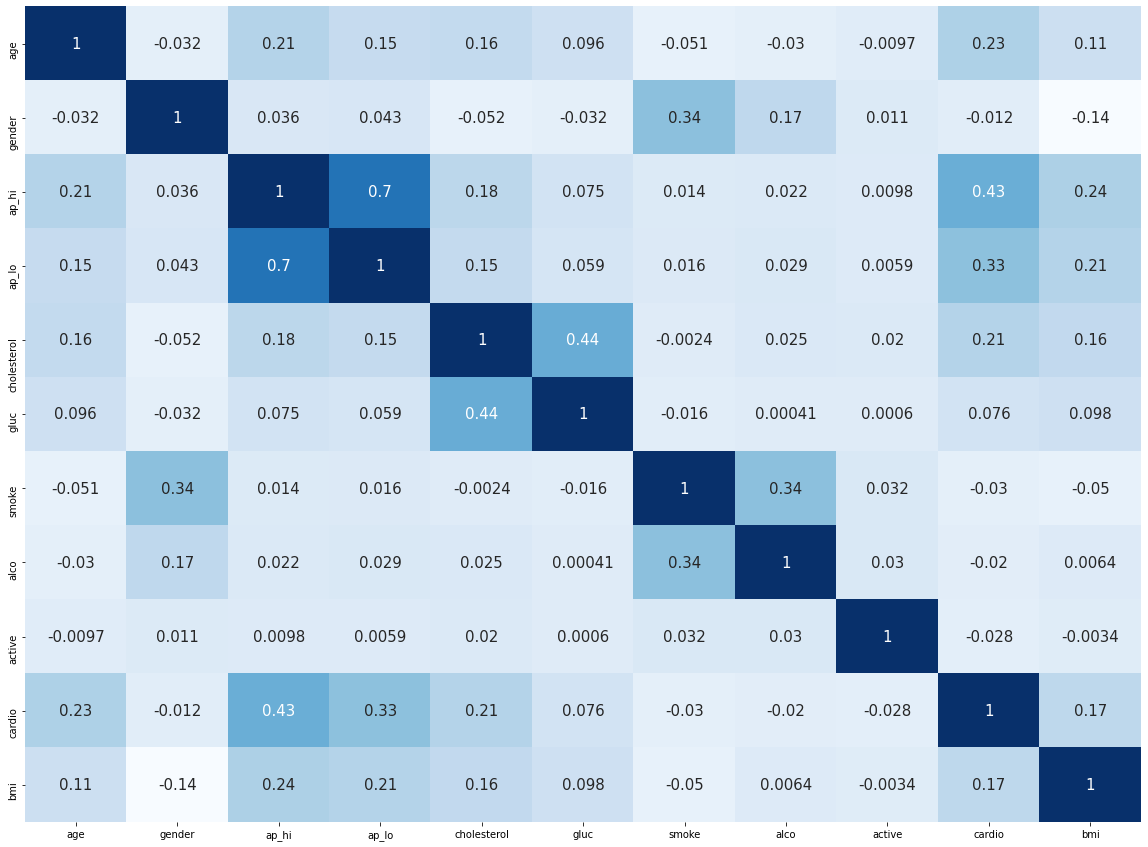

In [360]:
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(DFcardio.corr(), cbar=False, annot=True, cmap="Blues", annot_kws={"fontsize":15})

In [361]:
DFcardio

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,52,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,130,90,1,1,0,0,1,1,23.661439
69994,58,1,150,80,1,1,0,0,1,1,29.384757
69995,53,2,120,80,1,1,1,0,1,0,26.927438
69998,61,1,135,80,1,2,0,0,0,1,27.099251


# Data Modling

Algorithms:
- Logistic Regression.
- K-nearest neighbors. 
- Decision Tree. 
- Extra Trees. 
- Random Forest.
- Gaussian Naive Bayes. 
- Bernoulli Naive Bayes.

# Logistic Regression

In [501]:
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
lr = LogisticRegression()

In [502]:
lsgr = GridSearchCV(lr,param_grid,cv=10)
lsgr.fit(X_train,y_train)
lsgr.score(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator fit failed. The scor

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

0.7174490394233091

In [503]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : DecisionTreeClassifier(max_depth=7, max_leaf_nodes=59)
best_params_ : {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 59, 'min_samples_split': 2}
best_score_ : 0.7308273270888653


In [504]:
y_pred_Log_Reg = lsgr.predict(X_test)
#accuracy on LR
accuracy = metrics.accuracy_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Accuracy = ', accuracy )
#precision on LR
Precision = metrics.precision_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Precision = ', Precision)
#Recall on LR
Recall = metrics.recall_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression Recall = ', Recall)
#F1 score on LR
f1_score = metrics.f1_score(y_test,y_pred_Log_Reg)
print ('Logistic Regression F1 score= ',f1_score )



Logistic Regression Accuracy =  0.7201847783223481
Logistic Regression Precision =  0.747083583884546
Logistic Regression Recall =  0.6844424856765094
Logistic Regression F1 score=  0.7143925018687827


# KNN

In [505]:
neighbors = [i for i in range(0,100,3)][1:]
parameters = {'n_neighbors':neighbors, 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                         33, 36, 39, 42, 45, 48, 51, 54, 57, 60,
                                         63, 66, 69, 72, 75, 78, 81, 84, 87, 90, ...],
                         'weights': ['uniform', 'distance']})

In [506]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : KNeighborsClassifier(metric='manhattan', n_neighbors=96)
best_params_ : {'metric': 'manhattan', 'n_neighbors': 96, 'weights': 'uniform'}
best_score_ : 0.7142413002598792


In [507]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=96 ,weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=96)

In [508]:
y_pred_knn = knn.predict(X_test)
#accuracy on  KNN
accuracy = metrics.accuracy_score(y_test,y_pred_knn)
print ('KNN Accuracy = ', accuracy)
#precision on KNN
Precision = metrics.precision_score(y_test,y_pred_knn)
print ('KNN Precision = ', Precision)
#Recall on KNN
Recall = metrics.recall_score(y_test,y_pred_knn)
print ('KNN Recall = ', Recall)
#F1 score on KNN
f1_score = metrics.f1_score(y_test,y_pred_knn)
print ('KNN F1 score= ',f1_score )

KNN Accuracy =  0.7200157737592249
KNN Precision =  0.7540212818609255
KNN Recall =  0.6714411635081534
KNN F1 score=  0.7103392003730039


# Decision Tree Classifier

In [509]:
parameters = {'criterion':['gini','entropy'], 'max_depth':np.arange(3, 10),'max_leaf_nodes': list(range(2, 100))
              , 'min_samples_split': [2, 3, 4]}
dtree_model = DecisionTreeClassifier()
gs = GridSearchCV(dtree_model , parameters, cv=15, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [510]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=54)
best_params_ : {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 54, 'min_samples_split': 2}
best_score_ : 0.7182076619906981


In [511]:
dtree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, max_leaf_nodes=54, min_samples_split= 2)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=54)

In [512]:
#dtree = DecisionTreeClassifier()
#dtree.fit(X_train,y_train)

In [513]:
y_pred_dtree = dtree_model.predict(X_test)
#accuracy on DT
accuracy = metrics.accuracy_score(y_test,y_pred_dtree)
print ('Decision Tree Accuracy = ', accuracy )
#precision on DT
Precision = metrics.precision_score(y_test,y_pred_dtree)
print ('Decision Tree Precision = ', Precision)
#Recall on DT
Recall = metrics.recall_score(y_test,y_pred_dtree)
print ('Decision Tree Recall = ', Recall)
#F1 score on DT
f1_score = metrics.f1_score(y_test,y_pred_dtree)
print ('Decision Tree F1 score= ',f1_score )

Decision Tree Accuracy =  0.7268322911385274
Decision Tree Precision =  0.7434066566854773
Decision Tree Recall =  0.7112163948876157
Decision Tree F1 score=  0.7269553465848302


# Random Forest Classifier

In [514]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [548]:
y_pred_rf = rf.predict(X_test)
#accuracy on
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy = ', accuracy )
#precision on
Precision = metrics.precision_score(y_test, y_pred_rf)
print('Random Forest Precision = ', Precision )
#Recall on
Recall = metrics.recall_score(y_test, y_pred_rf)                                   
print('Random Forest Recall = ', Recall )
#F1 score on
f1_score = metrics.f1_score(y_test, y_pred_rf)                                   
print('Random Forest F1 = ', f1_score)
print('\n')


Random Forest Accuracy =  0.6694834093853868
Random Forest Precision =  0.6718800214247456
Random Forest Recall =  0.6910533274570295
Random Forest F1 =  0.6813318125033947




In [516]:

et_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
GaussianNB_model = GaussianNB()
BernoulliNB_model = BernoulliNB()


et_model.fit(X_train, y_train)
GaussianNB_model.fit(X_train, y_train)
BernoulliNB_model.fit(X_train, y_train)

BernoulliNB()

In [519]:
model_names = ["et_model", "GaussianNB_model", "BernoulliNB_model"]
models = []
accuracies = []
precisions = []
recalls = []
roc_scores = []
f1_scores = []

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} Score of train set: {round(curr_model.score(X_train, y_train), 5)}')
    print(f'{model_name} Accuracy: {round(accuracy_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} Precision: {round(precision_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} Recall: {round(recall_score(y_test, curr_model.predict(X_test)), 5)}')
    print(f'{model_name} F1_Score: {round(f1_score(y_test, curr_model.predict(X_test)), 5)}\n\n')
    
    models.append(model_name)
    accuracies.append(round(accuracy_score(y_test, curr_model.predict(X_test)),5))
    f1_scores.append(round(f1_score(y_test, curr_model.predict(X_test)),5))
    precisions.append(round(precision_score(y_test, curr_model.predict(X_test)),5))
    recalls.append(round(recall_score(y_test, curr_model.predict(X_test)),5))
    roc_scores.append(round(roc_auc_score(y_test, curr_model.predict(X_test)),5))

et_model Score of train set: 0.98603
et_model Accuracy: 0.64791
et_model Precision: 0.6509
et_model Recall: 0.67155
et_model F1_Score: 0.66106


GaussianNB_model Score of train set: 0.70389
GaussianNB_model Accuracy: 0.70841
GaussianNB_model Precision: 0.7578
GaussianNB_model Recall: 0.63156
GaussianNB_model F1_Score: 0.68894


BernoulliNB_model Score of train set: 0.51354
BernoulliNB_model Accuracy: 0.51958
BernoulliNB_model Precision: 0.51761
BernoulliNB_model Recall: 0.8874
BernoulliNB_model F1_Score: 0.65384




# Comparing performance of all modules



In [528]:
from sklearn.metrics import roc_curve

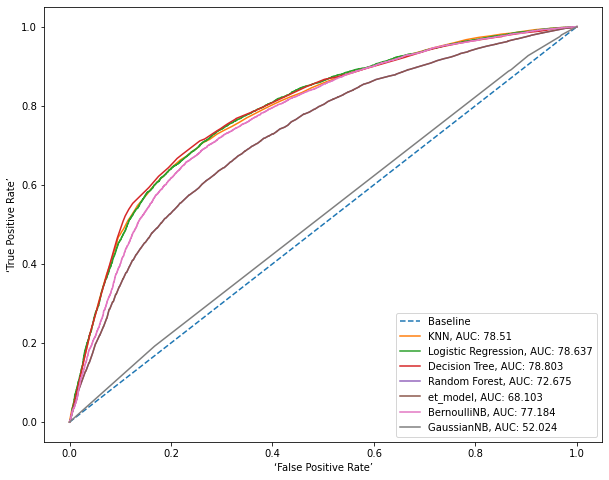

In [547]:
fig, ax = plt.subplots(figsize=(10,8))


#1
knn_probs = knn.predict_proba(X_test)[:, 1]
#2
lr_probs = lsgr.predict_proba(X_test)[:, 1]
#3
dtree_probs = dtree_model.predict_proba(X_test)[:, 1]
#4
rf_probs = rf.predict_proba(X_test)[:, 1]
#5
et_probs = et_model.predict_proba(X_test)[:, 1]
#6
Gb_probs = GaussianNB_model.predict_proba(X_test)[:, 1]
#7
NB_probs = BernoulliNB_model.predict_proba(X_test)[:, 1]



# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_test, knn_probs)
fpr2, tpr2, _ = roc_curve(y_test, lr_probs )
fpr3, tpr3, _ = roc_curve(y_test, dtree_probs)
fpr4, tpr4, _ = roc_curve(y_test, rf_probs )
fpr5, tpr5, _ = roc_curve(y_test, et_probs)
fpr6, tpr6, _ = roc_curve(y_test, Gb_probs)
fpr7, tpr7, _ = roc_curve(y_test, NB_probs)

auc1 = round(100*(roc_auc_score(y_test, knn_probs)), 3)
auc2 = round(100*(roc_auc_score(y_test,lr_probs)), 3)
auc3 = round(100*(roc_auc_score(y_test,dtree_probs)), 3)
auc4 = round(100*(roc_auc_score(y_test, rf_probs)), 3)
auc5 = round(100*(roc_auc_score(y_test, et_probs)), 3)
auc6 = round(100*(roc_auc_score(y_test, Gb_probs)), 3)
auc7 = round(100*(roc_auc_score(y_test, NB_probs)), 3)

# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'KNN, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Logistic Regression, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Decision Tree, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'Random Forest, AUC: {auc4}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'et_model, AUC: {auc5}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'BernoulliNB, AUC: {auc6}')
plt.plot(fpr7, tpr7, linestyle='-', label=f'GaussianNB, AUC: {auc7}')
# axis labels
plt.xlabel('‘False Positive Rate’')
plt.ylabel('‘True Positive Rate’')
# show the legend
plt.legend()
# show the plot
plt.show()